In [119]:
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [120]:
df = pd.read_csv('/content/all_days.csv')

In [121]:
df.head()

,Unnamed: 0,area_start,area_end,destination,distance,day_begin,time_begin,day_end,time_end,duration,coordinates,begin_lat,begin_lon,end_lat,end_lon
0,0,Басманный район,район Косино-Ухтомский,ЦАО -> ВАО,19543,Понедельник,66,Понедельник,1619,1553,,55.763900,37.648600,55.709600,37.882300
1,1,район Раменки,район Ивановское,ЗАО -> ВАО,28858,Понедельник,121,Понедельник,2166,2045,,55.720400,37.524000,55.779600,37.829500
2,2,район Гольяново,район Гольяново,ВАО -> ВАО,131428,Понедельник,122,Понедельник,8489,8367,,55.812200,37.814900,55.813300,37.812600
3,3,Головинский,район Хорошёво-Мнёвники,САО -> СЗАО,9943,Понедельник,128,Понедельник,1195,1067,,55.838539,37.498039,55.783939,37.463299
4,4,Московская область,Московская область,Московская область -> Московская область,5966,Понедельник,180,Понедельник,4548,4368,,55.834209,37.981045,55.800408,37.934662


In [122]:
nex = df.groupby('area_end').area_end.count()-df.groupby('area_start').area_end.count() #Нехватка машин по районам 

In [123]:
nex = nex.reset_index()

In [124]:
nex

,index,area_end
0,2-я Новорублёвская улица,-2.0
1,3-я Черепковская улица,1.0
2,46К-9623,NaN
3,60-й километр,NaN
4,Академический район,-10.0
...,...,...
171,улица Ивана Франко,1.0
172,улица Коцюбинского,-3.0
173,улица Леси Украинки,-3.0
174,улица Маршала Сергеева,0.0


#Обработка данных

In [125]:
df = df.dropna()

In [126]:
df['time_begin'] = df['time_begin'].apply(lambda x: '{:02d}:{:02d}'.format(int(x / 3600), int((x % 3600) / 60)))
df['time_end'] = df['time_end'].apply(lambda x: '{:02d}:{:02d}'.format(int(x / 3600), int((x % 3600) / 60)))
df['duration'] = df['duration'].apply(lambda x: '{:02d}:{:02d}'.format(int(x / 3600), int((x % 3600) / 60)))

In [127]:
df = df[(df['area_end'].str.lower().str.contains('район'))|(df['area_start'].str.lower().str.contains('район'))]

In [128]:
df = df[(df['area_end'].str.lower().str.contains(' район'))|(df['area_start'].str.lower().str.contains(' район'))]

In [129]:
df = df[(df['area_end'].str.lower().str.contains('район '))|(df['area_start'].str.lower().str.contains('район '))]

In [130]:
new = df["destination"].str.split("->", n = 1, expand = True)

In [131]:
df["destination_begin"]= new[0]

In [132]:
df["destination_end"]= new[1]

In [133]:
df['destination_begin'] = df['destination_begin'].str.replace(' ','')

In [134]:
df['destination_end'] = df['destination_end'].str.replace(' ','')

In [135]:
YN = df[(df['day_begin'] =='Понедельник') | (df['day_begin'] == 'Вторник')| (df['day_begin'] == 'Среда')]#Сортируем датасет на будни

In [136]:
YM = df[(df['day_begin'] =='Пятница') | (df['day_begin'] == 'Суббота')| (df['day_begin'] == 'Воскресенье')]#Сортируем датасет на выходные

In [137]:
BY = YN[(YN['time_begin'] >='06:00') | (YN['time_end'] == '12:00')]#Будни утром

In [138]:
BV=YN[(YN['time_begin'] >='17:00') | (YN['time_end'] == '22:00')]#Будни вечером

In [139]:
VY=YM[(YM['time_begin'] >='06:00') | (YM['time_end'] == '12:00')]#Выходные утром

In [140]:
VV = df[(df['time_begin'] >='17:00') | (df['time_end'] == '22:00')]#Выходные вечером

#Работа с районами

In [141]:
df.groupby('area_start').area_end.count()#Сколькo машин было изначально

area_start
Академический район       122
Алексеевский район        120
Алтуфьевский район         28
Бабушкинский район         74
Басманный район           349
                         ... 
район Южное Бутово         26
район Южное Медведково     33
район Южное Тушино         30
район Якиманка            108
район Ясенево              36
Name: area_end, Length: 118, dtype: int64

In [142]:
it = BY.groupby('area_end').area_end.count()-BY.groupby('area_start').area_end.count()#Нехватка машин по районам утром

In [143]:
it.dropna(inplace = True)

In [144]:
it = it.reset_index()

In [145]:
iv = BV.groupby('area_end').area_end.count()-BV.groupby('area_start').area_end.count()
iv.dropna(inplace = True)
iv = iv.reset_index()

In [146]:
ik = VY.groupby('area_end').distance.count()-VY.groupby('area_start').distance.count()
ik.dropna(inplace = True)
ik = ik.reset_index()

In [147]:
im =VV.groupby('area_end').distance.count()-VV.groupby('area_start').distance.count()
im.dropna(inplace = True)
im = im.reset_index()

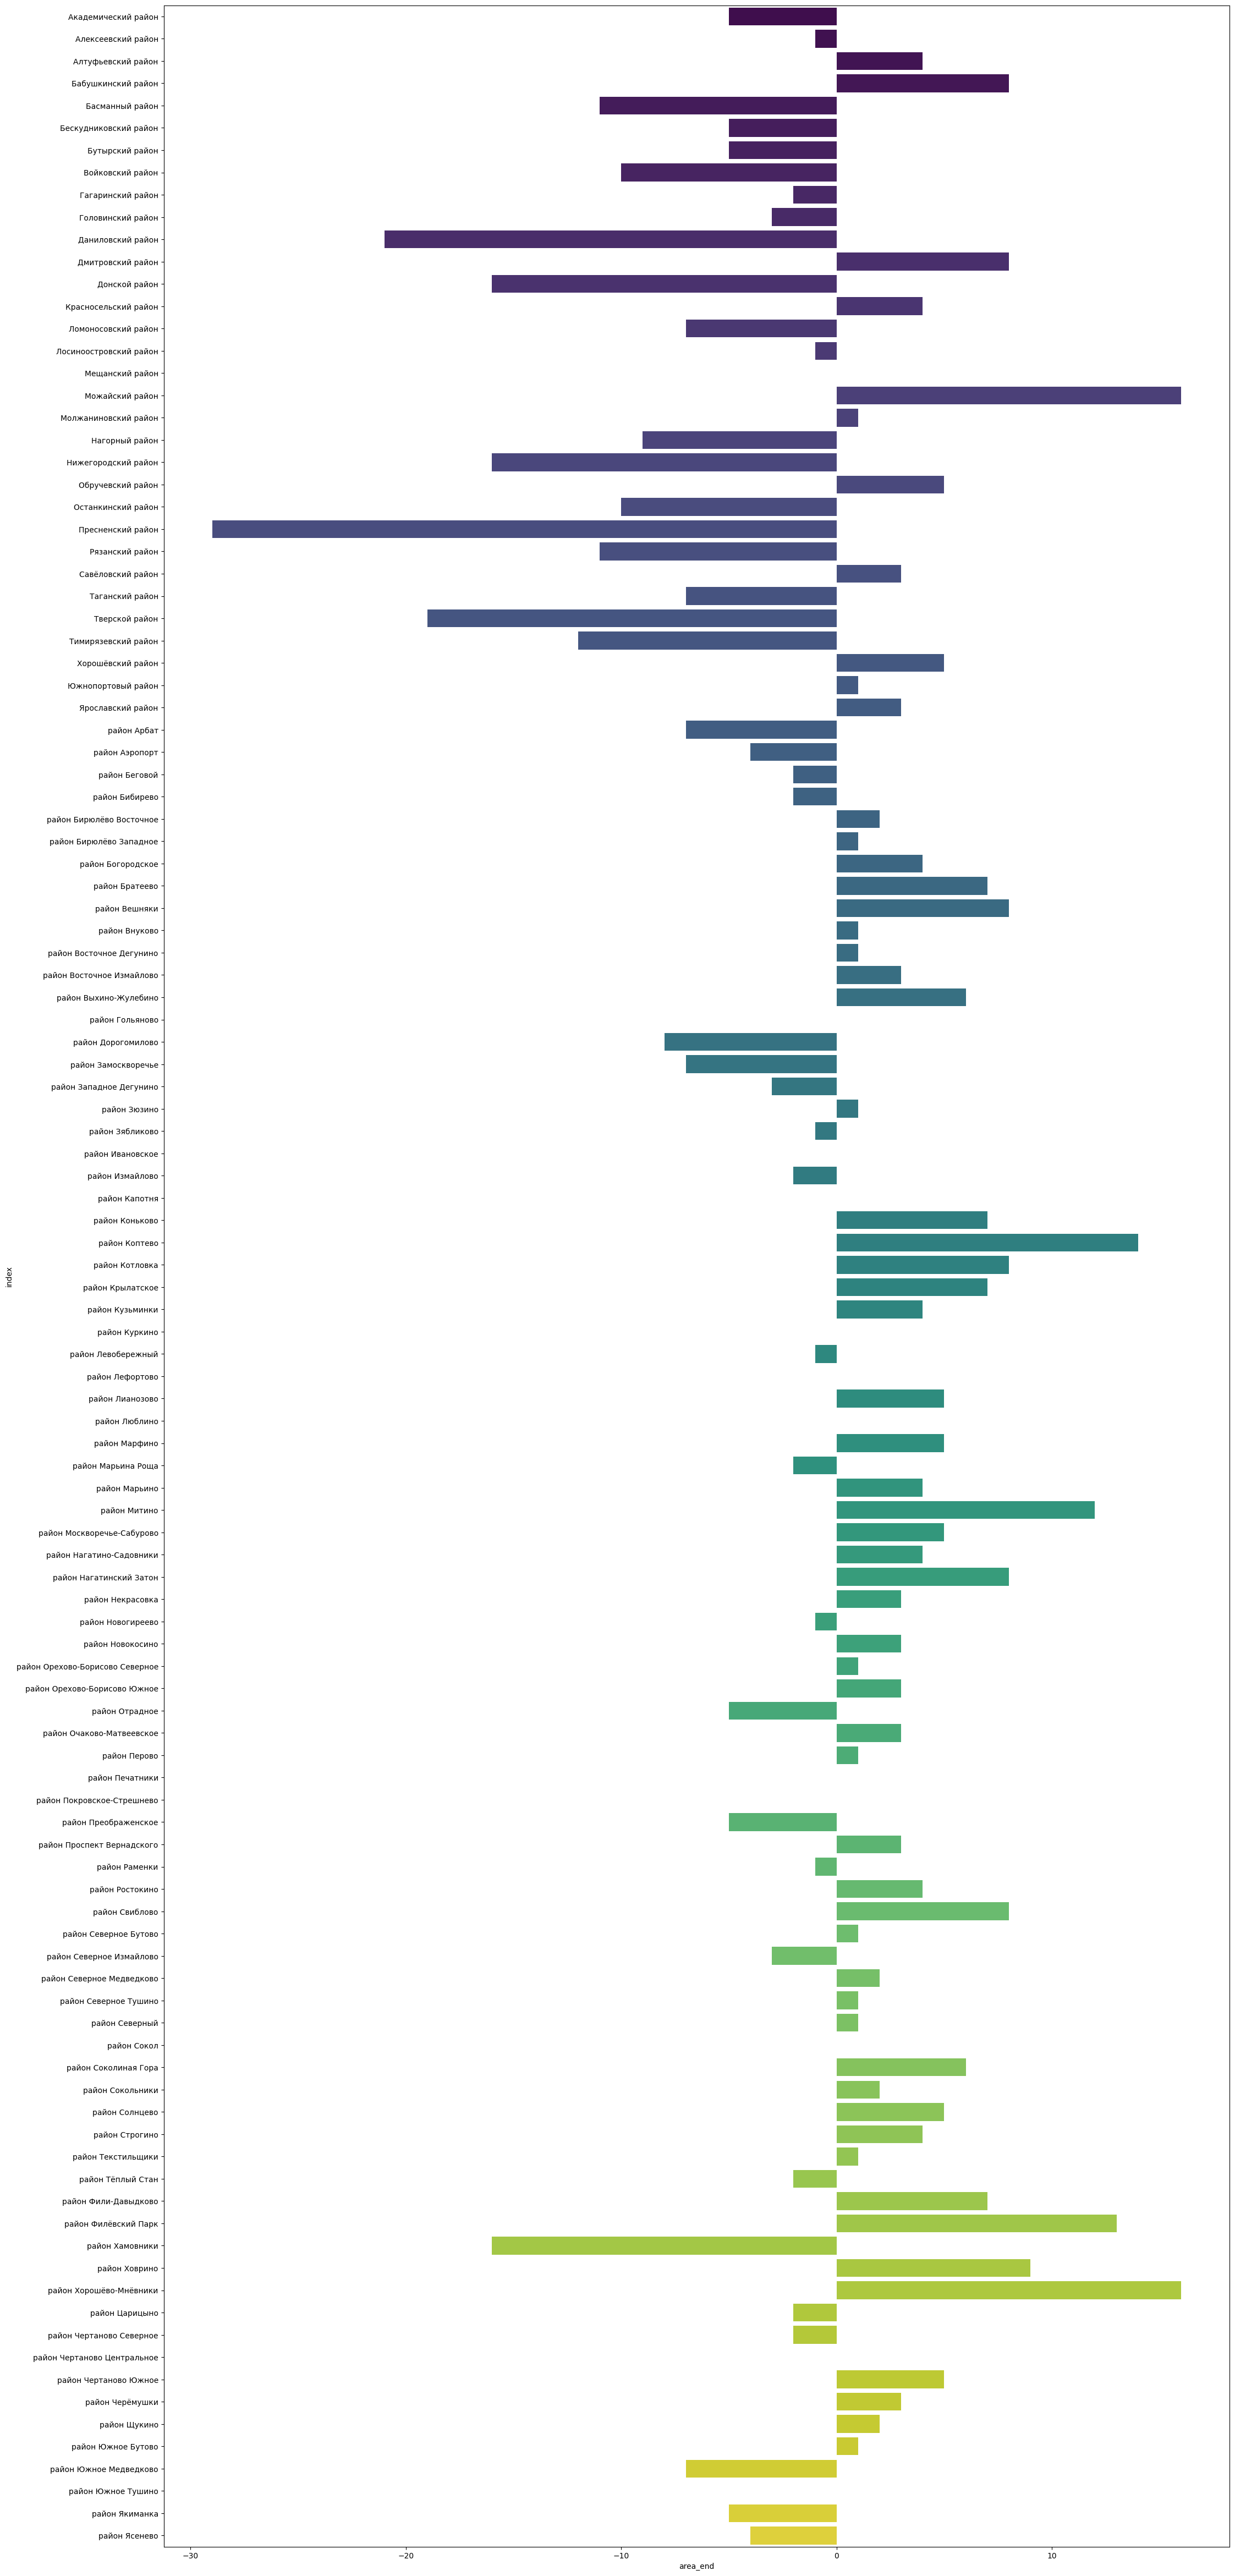

In [148]:
plt.figure(figsize=(25,60))#Нехватка машин по районам вечером будней
sns.barplot(data = iv,
            y = 'index',
            x = 'area_end',
            palette = 'viridis')
plt.show()

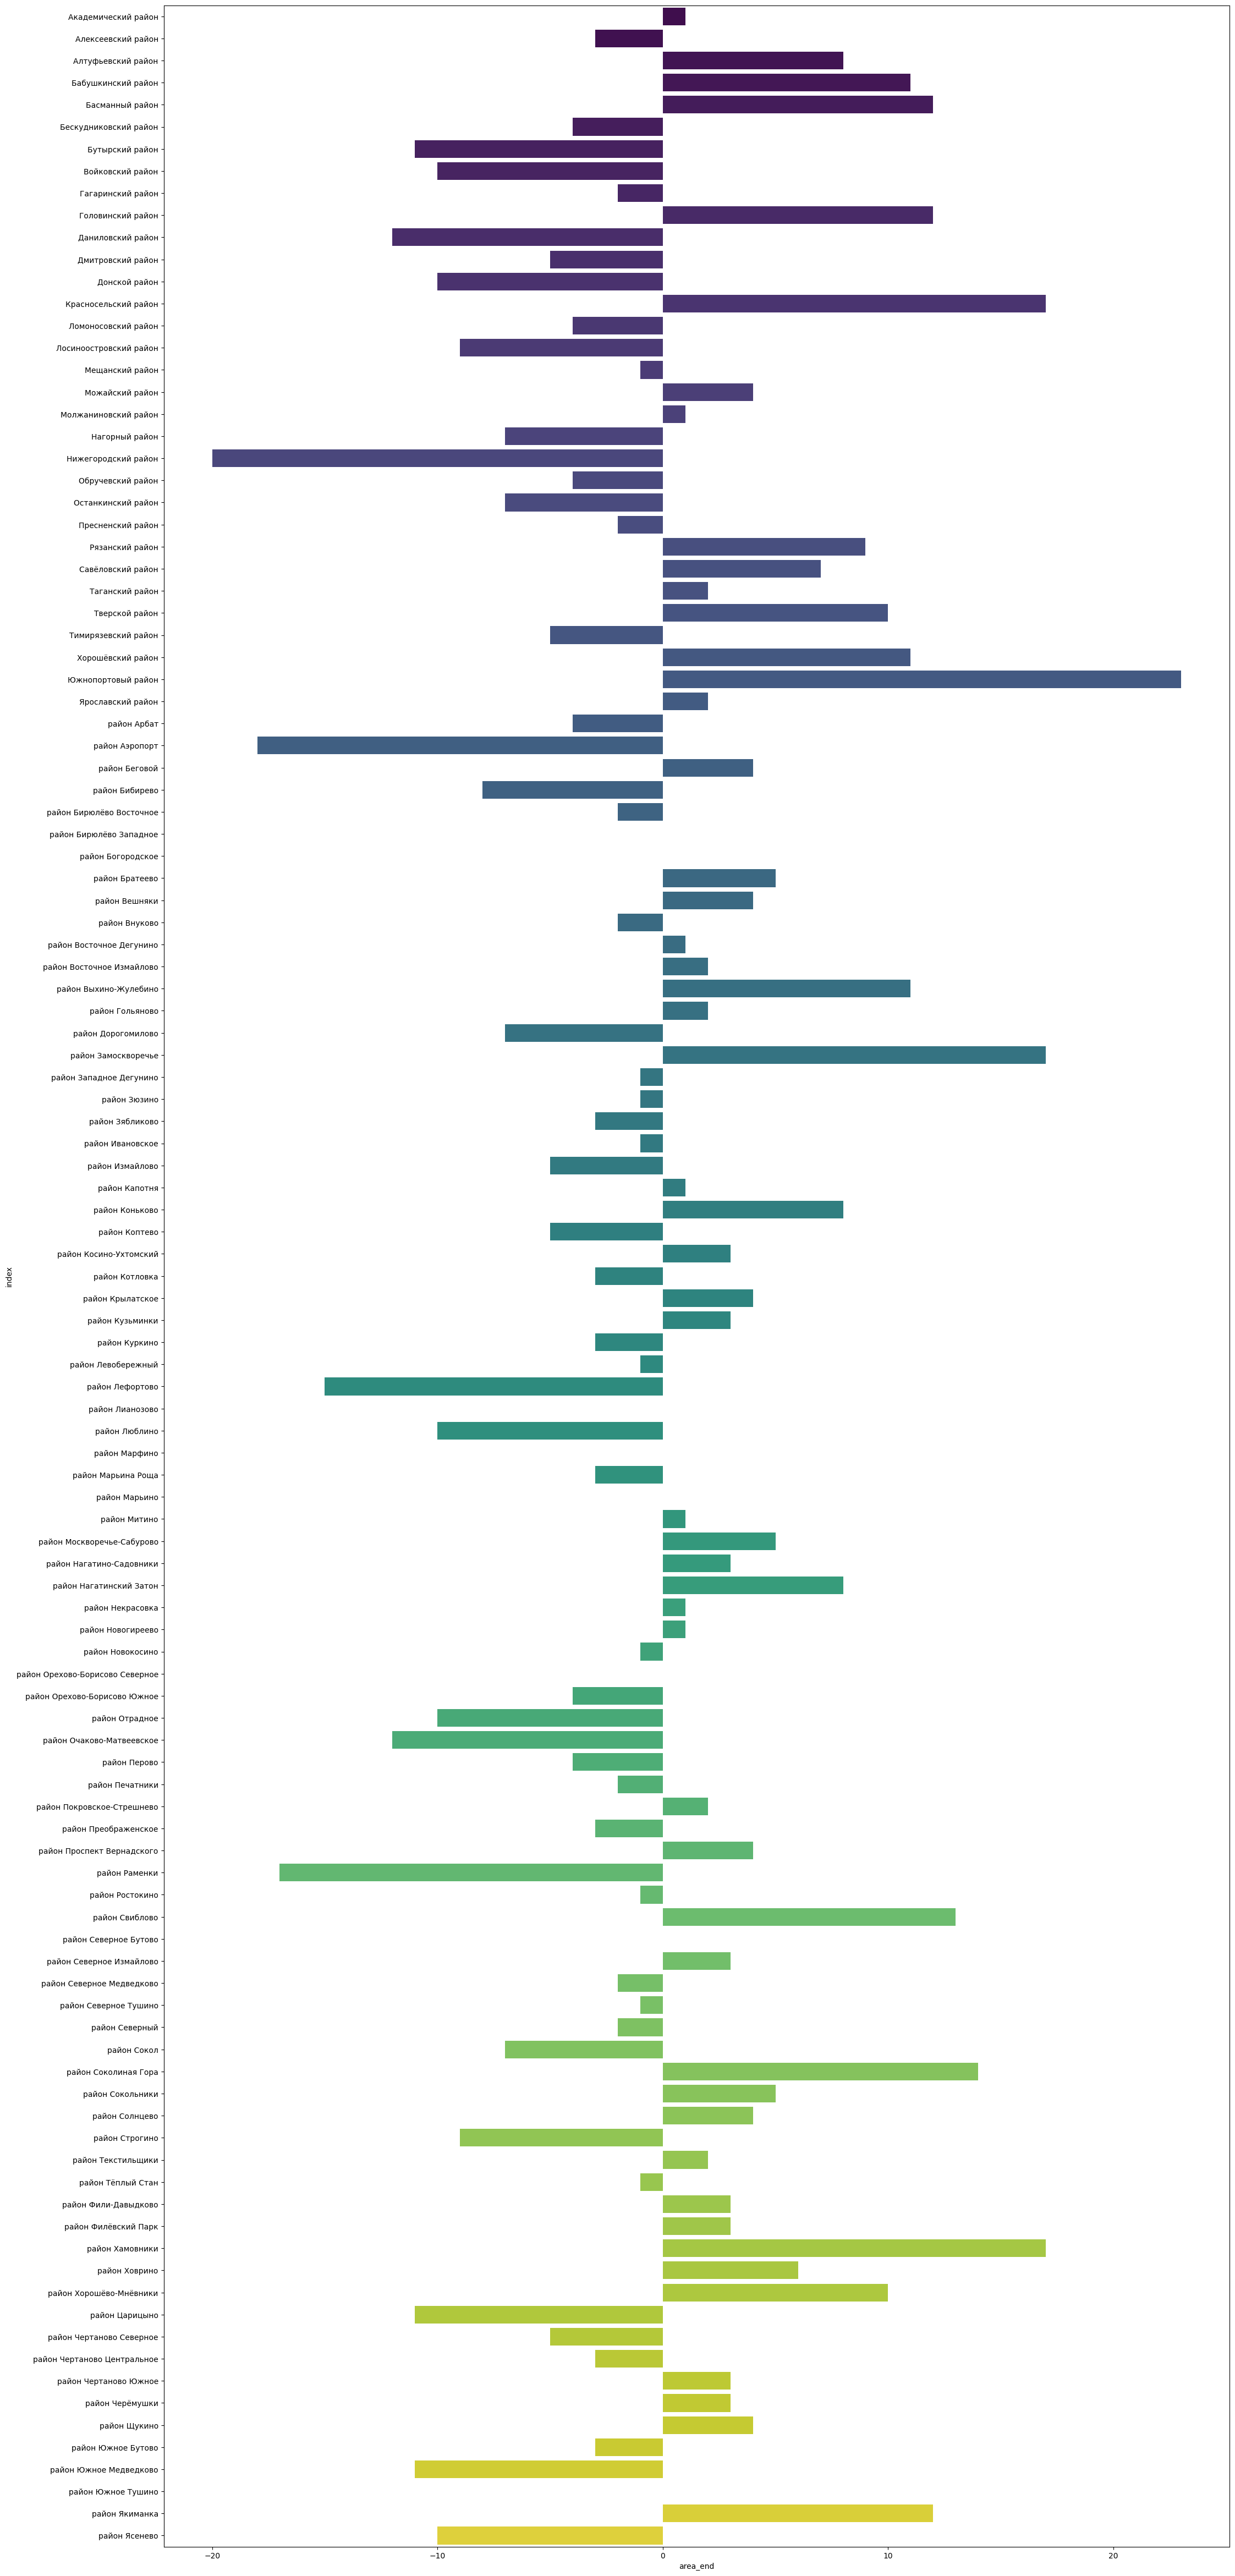

In [149]:
plt.figure(figsize=(25,60))#Нехватка машин по районам утром будней
sns.barplot(data = it,
            y = 'index',
            x = 'area_end',
            palette = 'viridis')
plt.show()

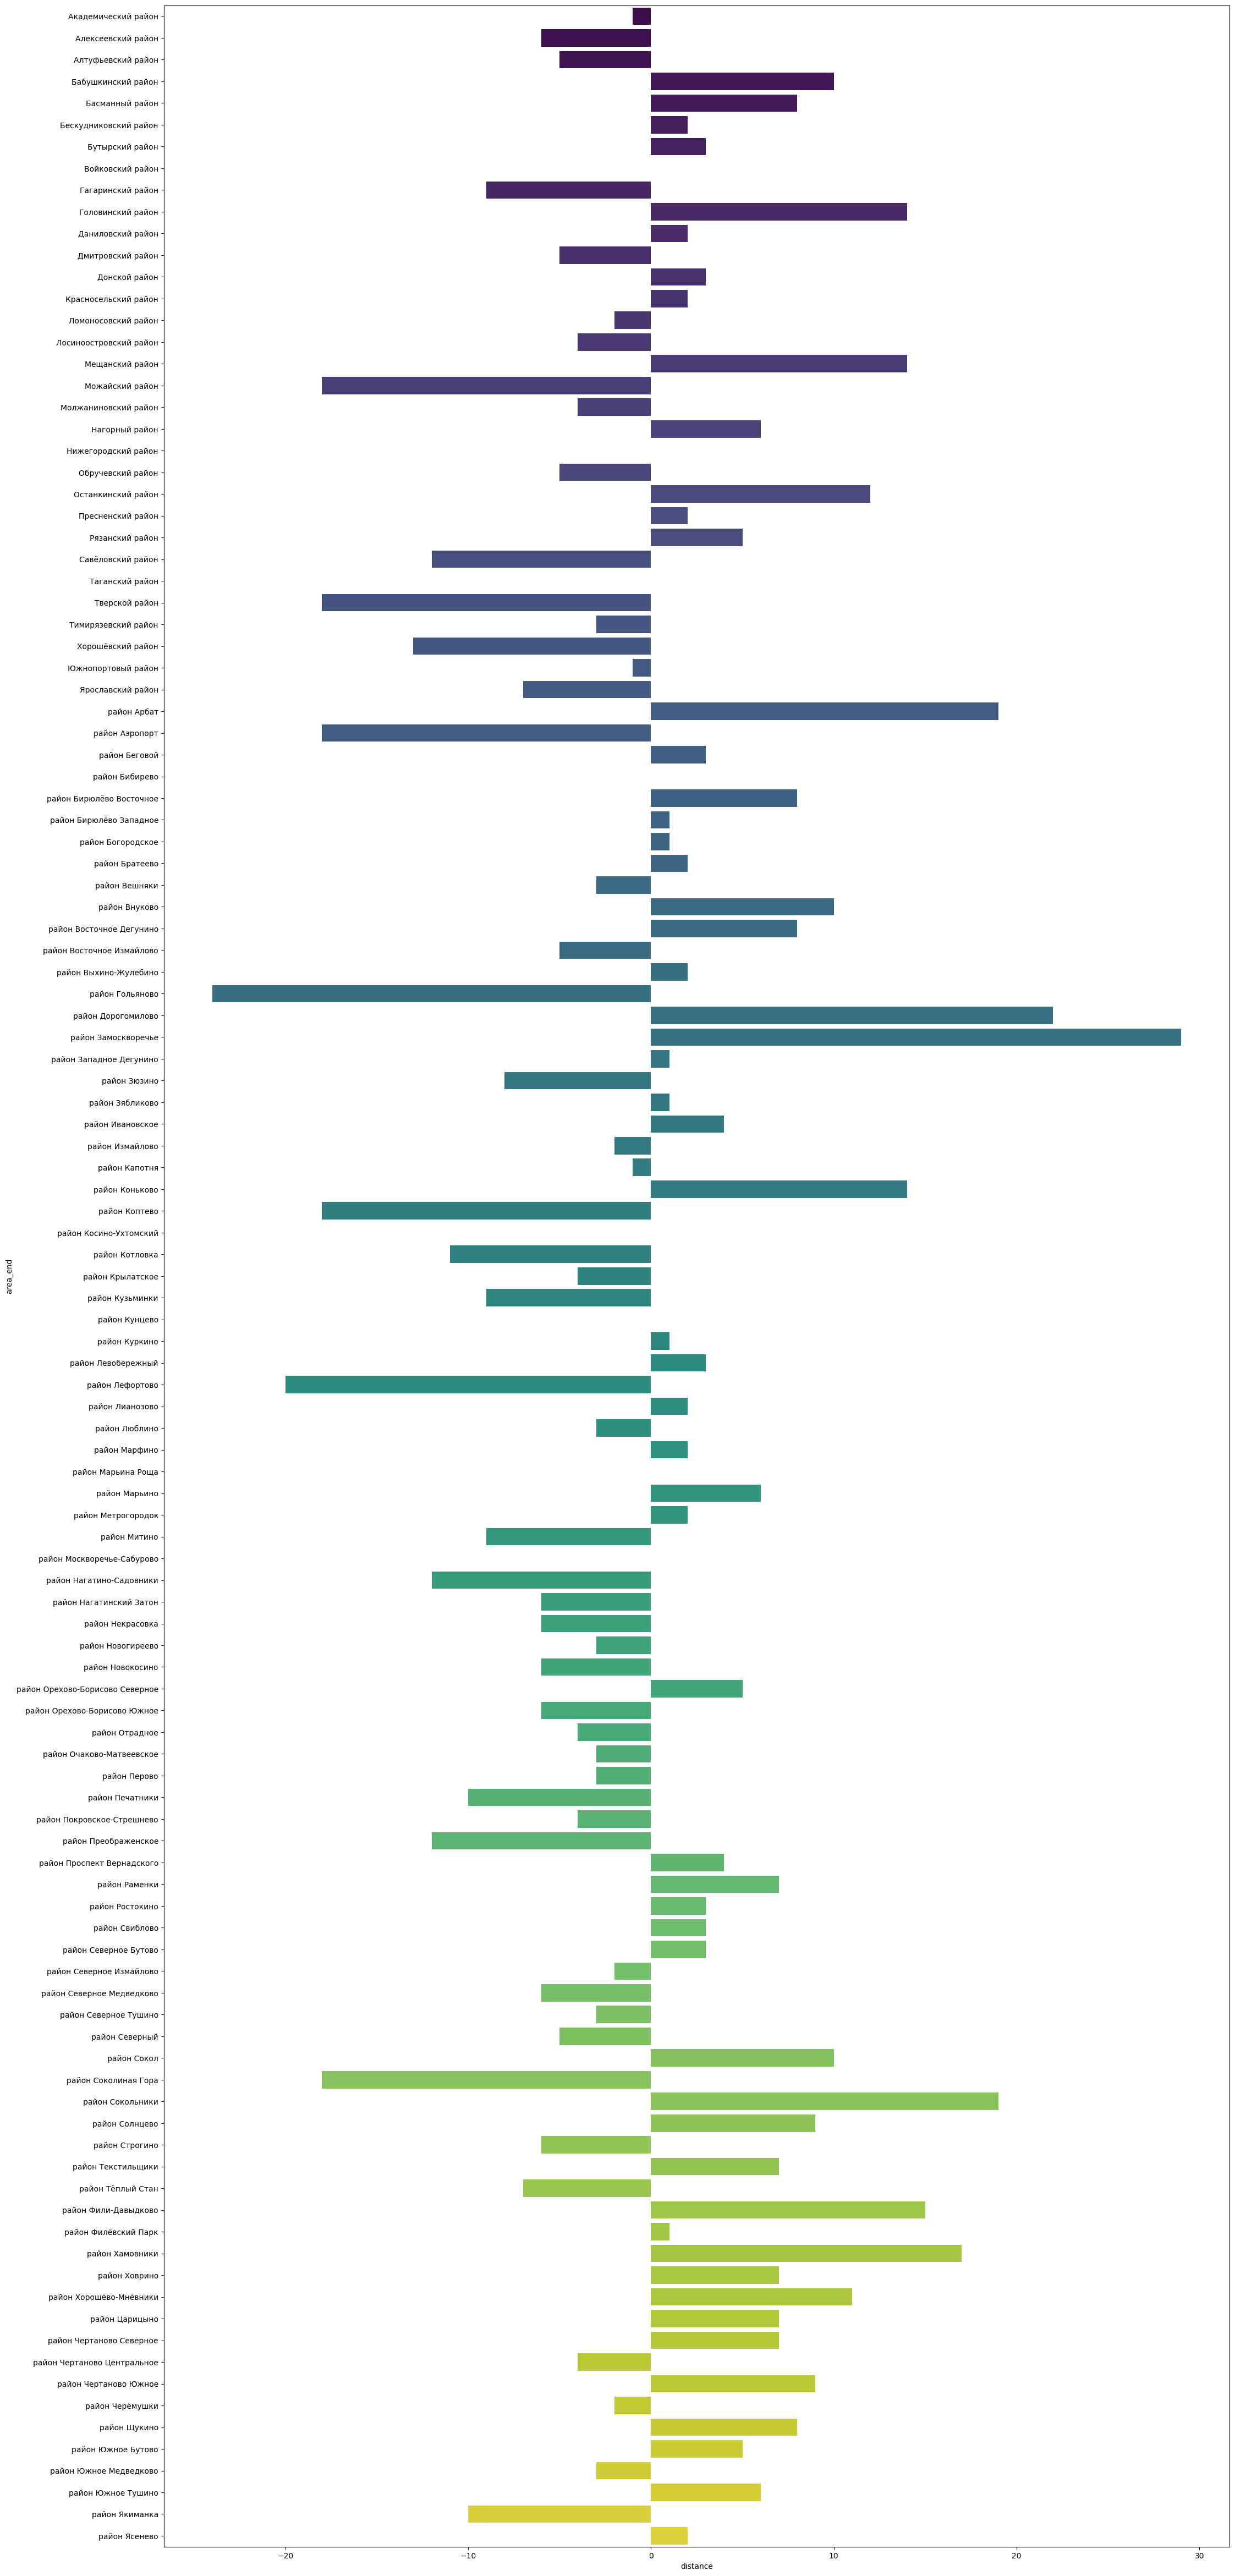

In [150]:
plt.figure(figsize=(25,60))#Нехватка машин по районам утром выходных
sns.barplot(data = ik,
            y = 'area_end',
            x = 'distance',
            palette = 'viridis')
plt.show()

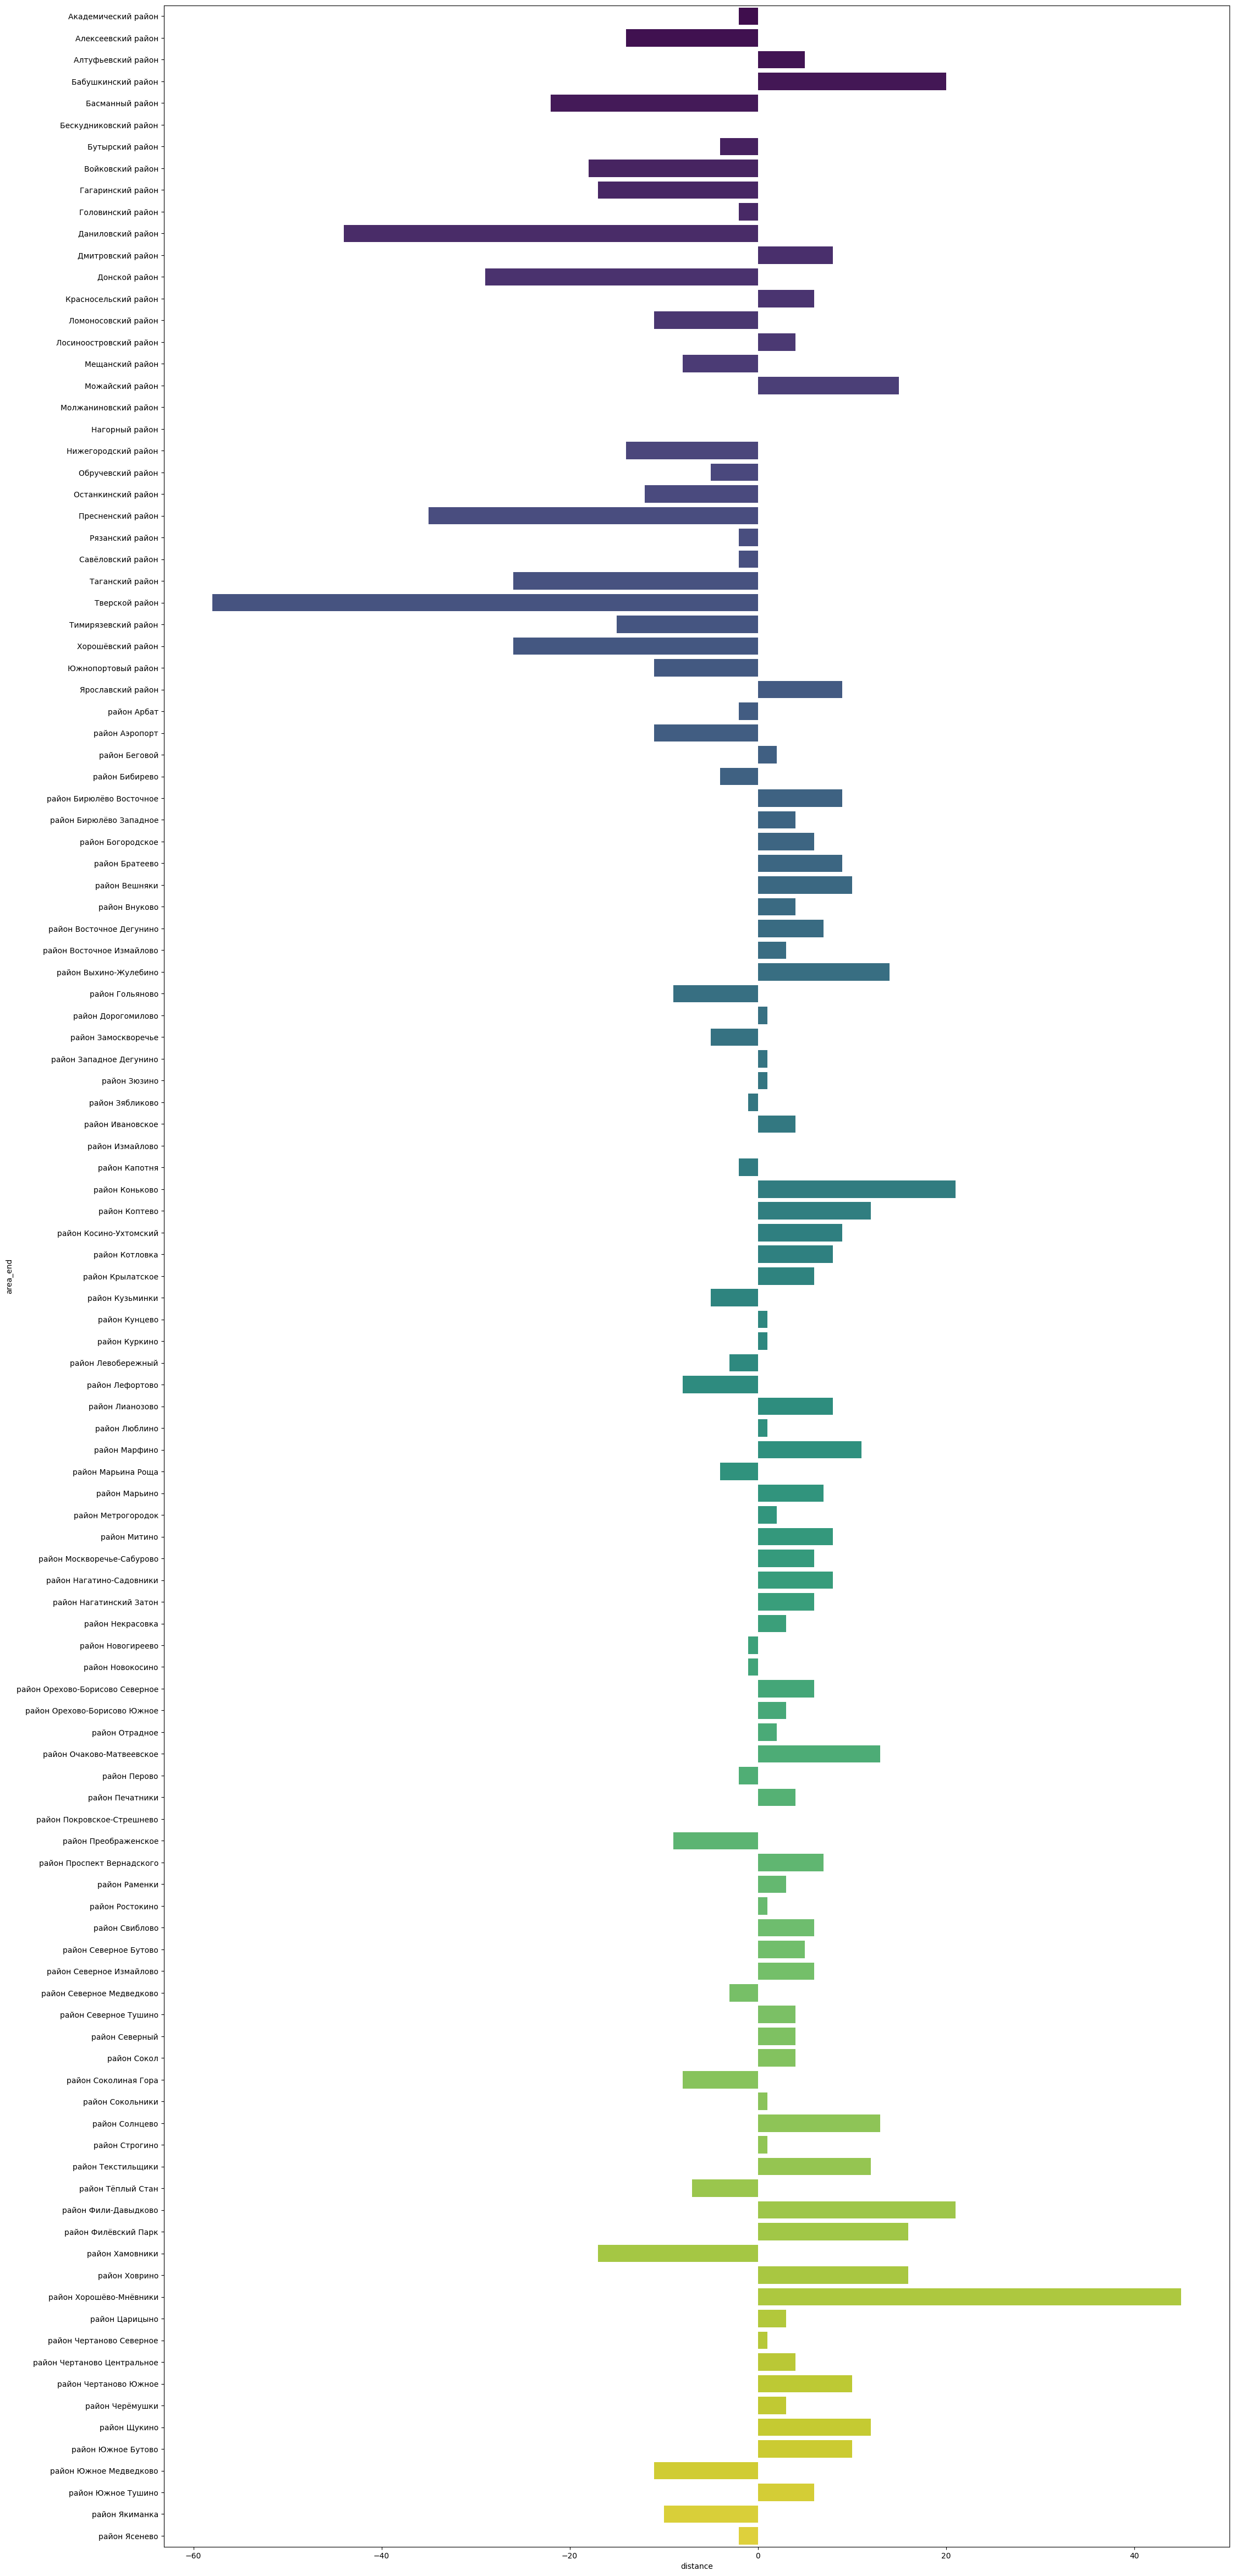

In [151]:
plt.figure(figsize=(25,60))#Нехватка машин по районам вечером выходных
sns.barplot(data = im,
            y = 'area_end',
            x = 'distance',
            palette = 'viridis')
plt.show()

#Работа со временем 

In [152]:
#df['time_begin'] = df['time_begin'].astype('datetime64')
#df['time_end'] = df['time_end'].astype('datetime64')
#df['duration'] = df['duration'].astype('datetime64')

In [153]:
df.groupby('area_start').duration.max()

area_start
Академический район       06:53
Алексеевский район        13:53
Алтуфьевский район        02:05
Бабушкинский район        23:32
Басманный район           20:50
                          ...  
район Южное Бутово        05:42
район Южное Медведково    01:47
район Южное Тушино        03:37
район Якиманка            05:54
район Ясенево             06:45
Name: duration, Length: 118, dtype: object

#Работа с округами

In [154]:
xp = (df[(df['destination_begin']==df['destination_end'])])

In [155]:
xt = (df[(df['destination_begin']!=df['destination_end'])])

In [156]:
xt = xt.groupby('destination_begin').destination_end.count() 

In [157]:
xt #Округа в которых не возвращают машины

destination_begin
ВАО      543
ЗАО      624
САО      814
СВАО     577
СЗАО     426
ЦАО     1763
ЮАО      604
ЮВАО     527
ЮЗАО     506
Name: destination_end, dtype: int64

<Axes: ylabel='destination_end'>

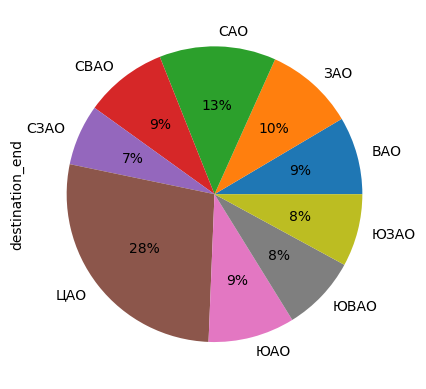

In [158]:
xt.groupby(['destination_begin']).sum().plot(
    kind='pie', y='votes_of_each_class', autopct='%1.0f%%')

In [159]:
xp = xp.groupby('destination_begin').destination_end.count()

In [160]:
xp #Округа в которых возвращают машины

destination_begin
ЗАО     182
САО     668
СВАО    468
ЦАО     522
ЮАО     218
ЮВАО    377
ЮЗАО    271
Name: destination_end, dtype: int64

<Axes: ylabel='destination_end'>

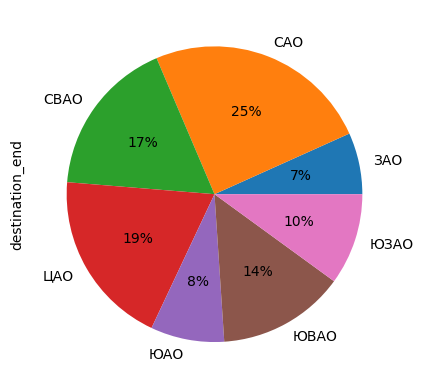

In [161]:
xp.groupby(['destination_begin']).sum().plot(
    kind='pie', y='votes_of_each_class', autopct='%1.0f%%')

In [162]:
YTR = df[(df['time_begin'] >='06:00') | (df['time_end'] == '12:00')]

In [163]:
YTR=YTR.groupby(['day_end','area_end']).distance.count().reset_index()

In [164]:
VER=df[(df['time_begin'] >='17:00') | (df['time_end'] == '22:00')]

In [165]:
VER=VER.groupby(['day_end','area_end']).distance.count().reset_index()

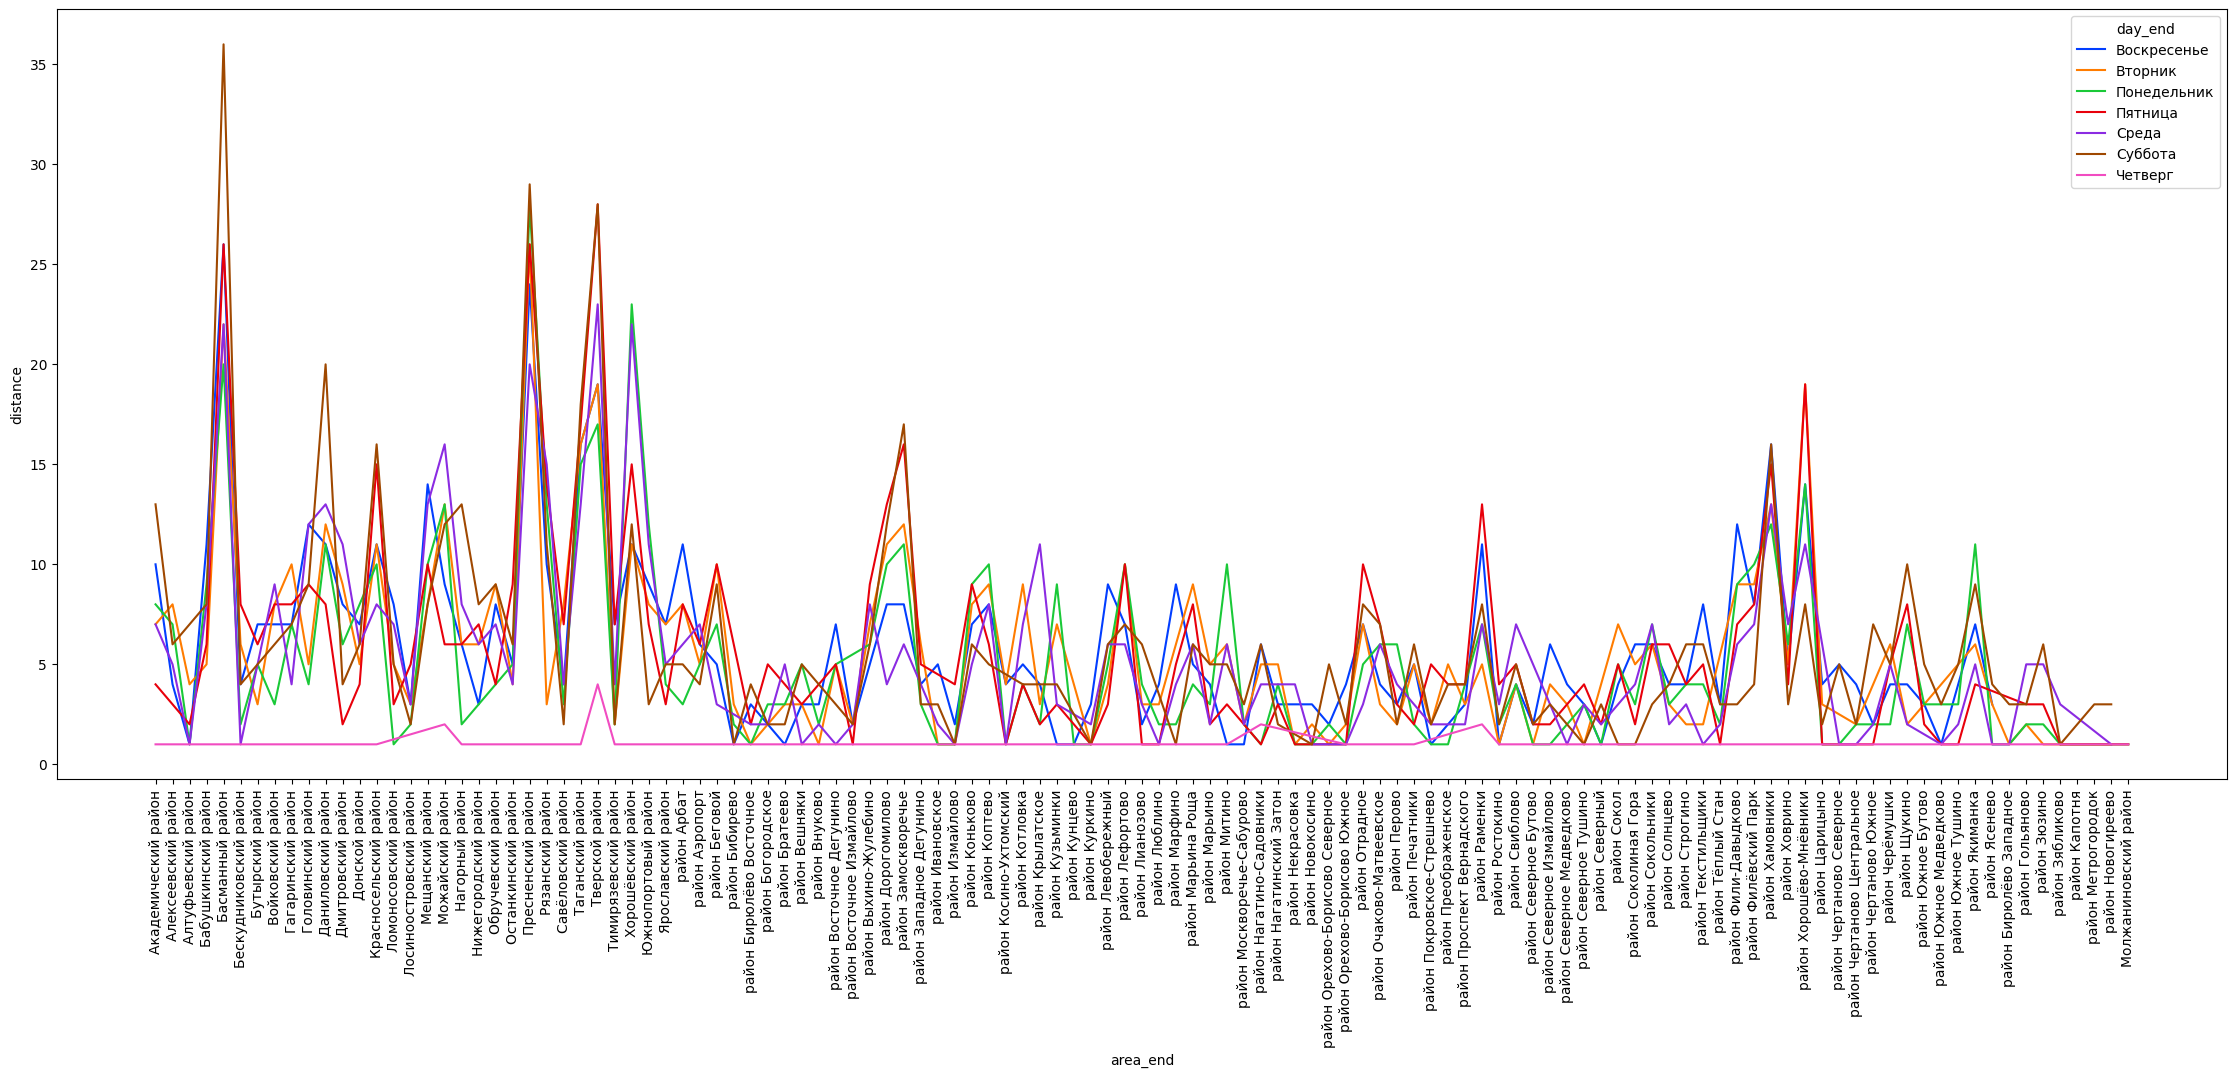

In [166]:
plt.figure(figsize=(28,10))#Вечерние поездки
plt.xticks(rotation=90)
sns.lineplot(
    x="area_end", 
    y="distance",
    data=VER,
    palette='bright',
    hue='day_end');

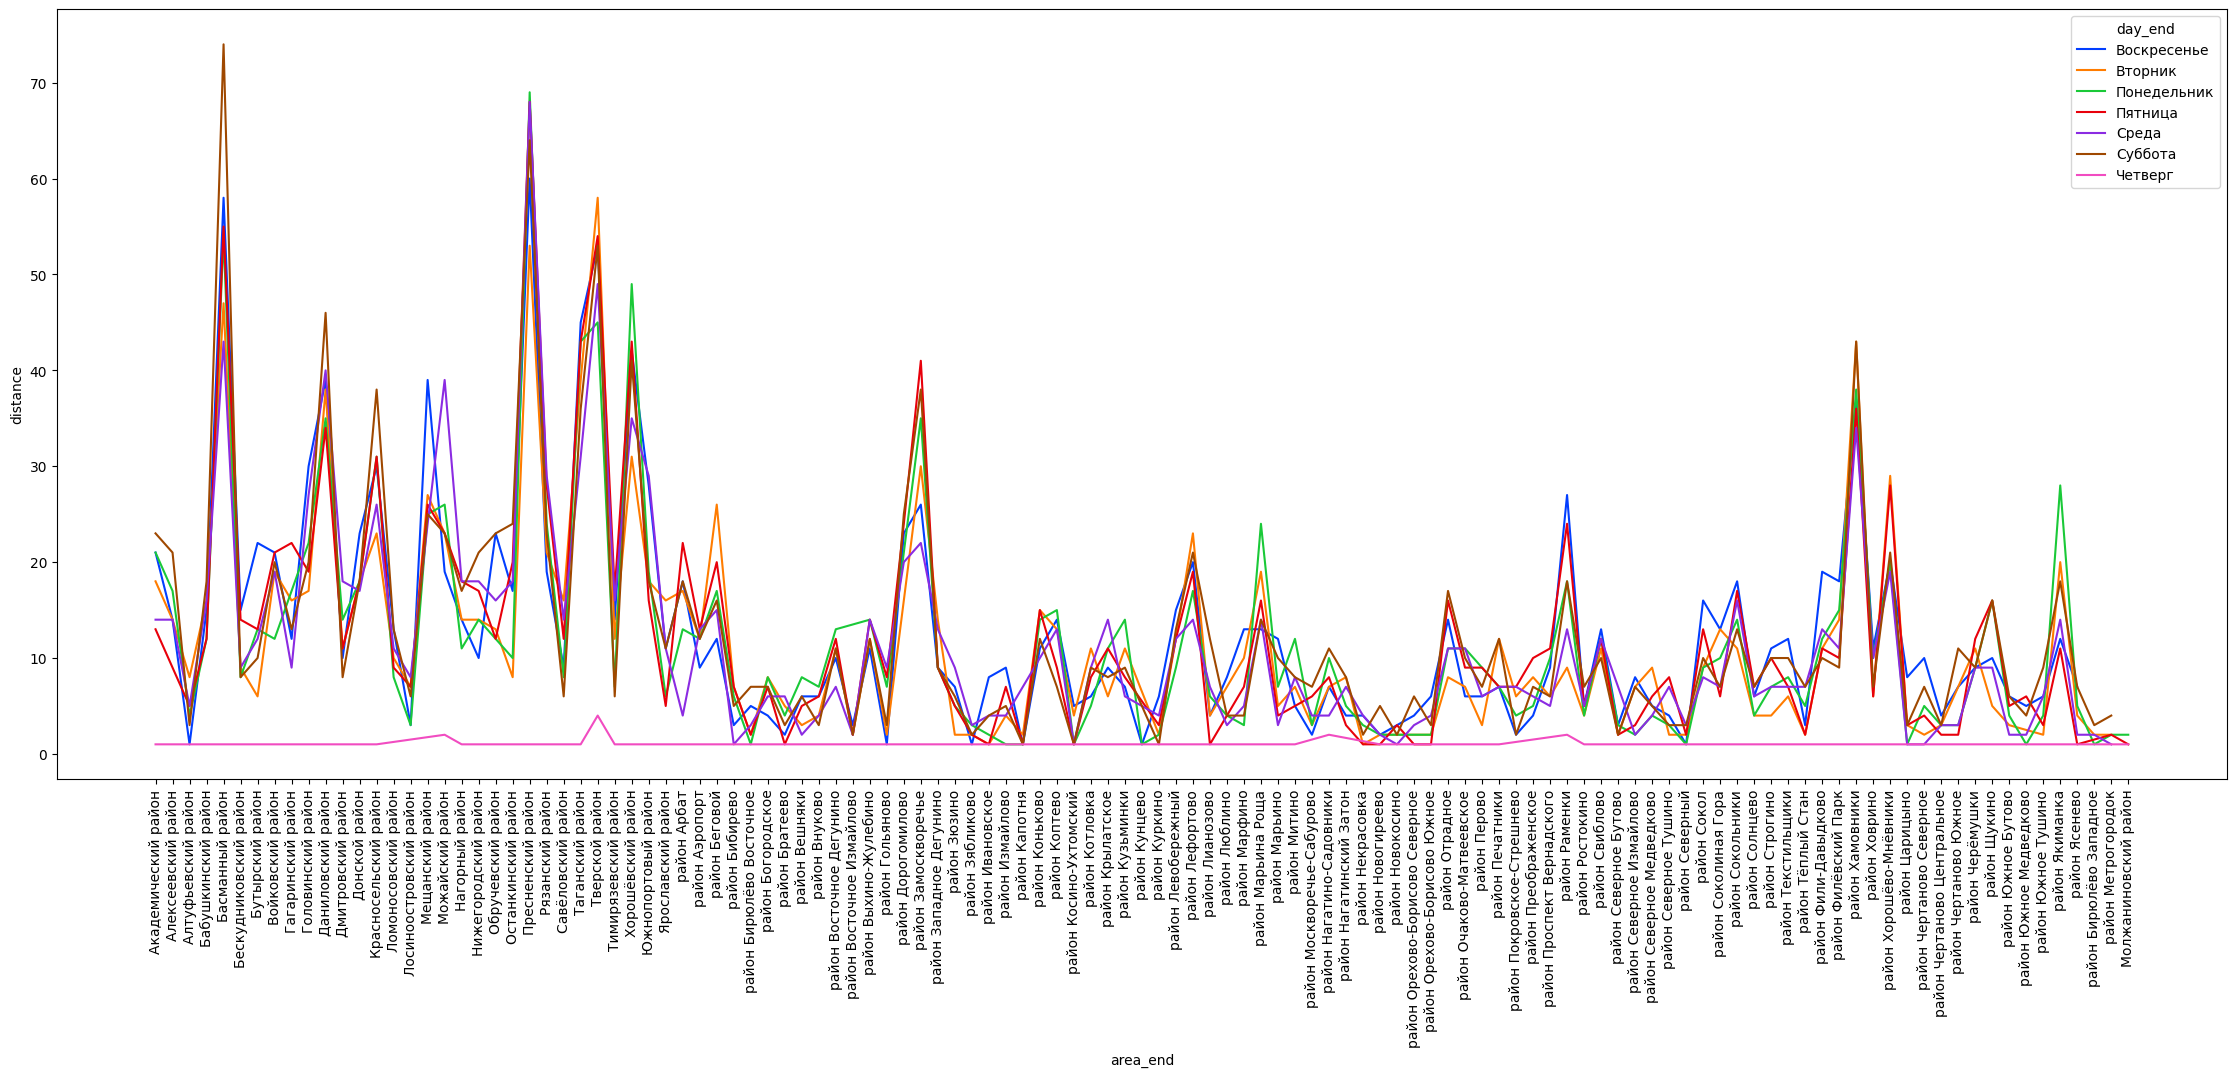

In [167]:
plt.figure(figsize=(28,10))#Утрение поездки 
plt.xticks(rotation=90)
sns.lineplot(
    x="area_end", 
    y="distance",
    data=YTR,
    palette='bright',
    hue='day_end');

In [168]:
IL= BY.groupby('destination_end').area_end.count()-BY.groupby('destination_begin').area_end.count()
IX= BV.groupby('destination_end').area_end.count()-BV.groupby('destination_begin').area_end.count()
IP= VY.groupby('destination_end').area_end.count()-VY.groupby('destination_begin').area_end.count()
IQ= VV.groupby('destination_end').area_end.count()-VV.groupby('destination_begin').area_end.count()

<Axes: title={'center': 'Нехватка машин по округам в выходные в переод с 17:00 по 22:00'}, ylabel='destination_end'>

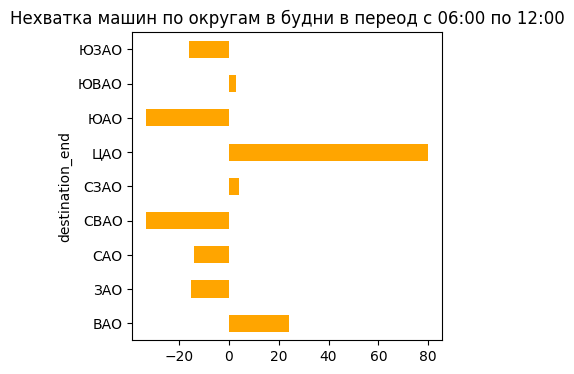

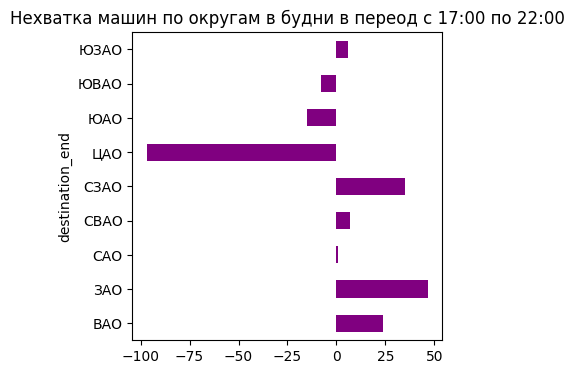

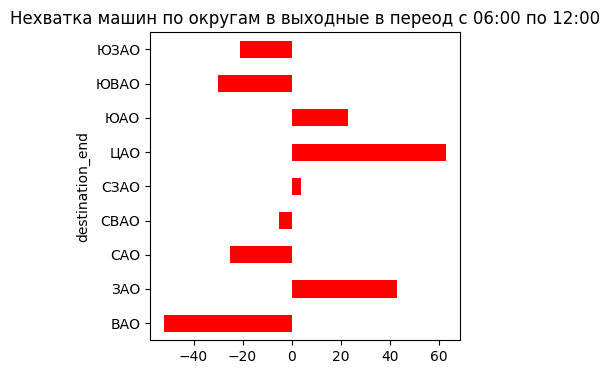

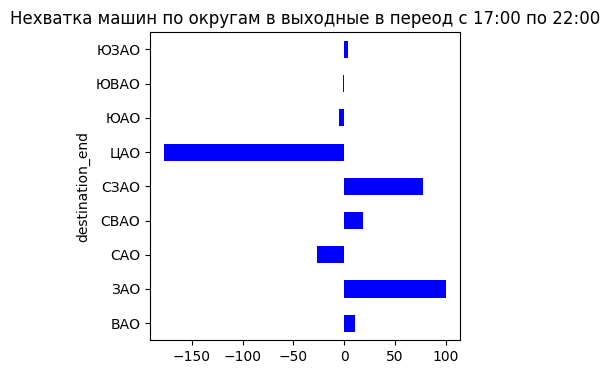

In [169]:
plt.figure(figsize=(4,4))
IL.plot.barh(x='destination_end', y='area_end',
             title='Нехватка машин по округам в будни в переод с 06:00 по 12:00', color='orange')
plt.figure(figsize=(4,4))
IX.plot.barh(x='destination_end', y='area_end',
             title='Нехватка машин по округам в будни в переод с 17:00 по 22:00', color='purple')
plt.figure(figsize=(4,4))
IP.plot.barh(x='destination_end', y='area_end',
             title='Нехватка машин по округам в выходные в переод с 06:00 по 12:00', color='red')
plt.figure(figsize=(4,4))
IQ.plot.barh(x='destination_end', y='area_end',
             title='Нехватка машин по округам в выходные в переод с 17:00 по 22:00', color='blue')

In [170]:
df.head()

,Unnamed: 0,area_start,area_end,destination,distance,day_begin,time_begin,day_end,time_end,duration,coordinates,begin_lat,begin_lon,end_lat,end_lon,destination_begin,destination_end
0,0,Басманный район,район Косино-Ухтомский,ЦАО -> ВАО,19543,Понедельник,00:01,Понедельник,00:26,00:25,,55.763900,37.648600,55.709600,37.88230,ЦАО,ВАО
13,13,Тимирязевский район,район Западное Дегунино,САО -> САО,9897,Понедельник,00:08,Понедельник,00:23,00:14,,55.817310,37.571007,55.869770,37.51326,САО,САО
17,17,Бабушкинский район,район Северное Медведково,СВАО -> СВАО,2207,Понедельник,00:09,Понедельник,00:14,00:04,,55.870200,37.663200,55.880900,37.65310,СВАО,СВАО
23,23,Таганский район,район Выхино-Жулебино,ЦАО -> ЮВАО,13721,Понедельник,00:12,Понедельник,00:40,00:27,,55.733669,37.650749,55.700249,37.80986,ЦАО,ЮВАО
29,29,район Марьино,Тверской район,ЮВАО -> ЦАО,20292,Понедельник,00:16,Понедельник,00:53,00:36,,55.653600,37.768200,55.778000,37.61000,ЮВАО,ЦАО


In [171]:
w = df.groupby(['destination_end','area_end']).distance.count().reset_index()

In [172]:
d = df.groupby(['destination_begin','area_start']).distance.count().reset_index()

In [173]:
d = d.drop(3)

In [174]:
d[d['area_start']=='район Восточный']

,destination_begin,area_start,distance


In [175]:
d.reset_index(drop= True , inplace= True )

In [176]:
w['itog'] = w['distance']-d['distance']

In [177]:
w

,destination_end,area_end,distance,itog
0,ВАО,район Богородское,47,5
1,ВАО,район Вешняки,34,3
2,ВАО,район Восточное Измайлово,14,-3
3,ВАО,район Гольяново,37,-18
4,ВАО,район Ивановское,23,5
...,...,...,...,...
112,ЮЗАО,район Северное Бутово,14,1
113,ЮЗАО,район Тёплый Стан,31,-5
114,ЮЗАО,район Черёмушки,67,4
115,ЮЗАО,район Южное Бутово,36,10


In [178]:
g =w.groupby('destination_end').itog.sum().reset_index()
g

,destination_end,itog
0,ВАО,-16
1,ЗАО,37
2,САО,-40
3,СВАО,-30
4,СЗАО,16
5,ЦАО,66
6,ЮАО,-9
7,ЮВАО,-7
8,ЮЗАО,-15


In [196]:
a=[]
for i in g.index:
  a.append(g['itog'][i])
  
    
k = 0

for i in range(0,len(a)-1):
    for j in range(i+1,len(a)):
        if a[i]<0:
            if k > abs(a[i]):
                o = abs(a[i])
                a[i] = 0
                k = k - o
                break
            elif k<abs(a[i]):
                a[i]+=k
                k=0
            if a[j]<0:
                pass
            elif a[j] == 0:
                pass
            elif a[j]>0:
                k+=a[j]
                a[j]=0
                if k > abs(a[i]):
                    o = abs(a[i])
                    a[i]+=o
                    k = k-o
                    break
                else:
                    pass
        elif a[i]>0:
            k+a[i]
            a[i] = 0
            break
        elif a[i] == 0:
            break

if k > 0:
    a[-1] +=k
for i in range(0,len(a)):
    print(a[i])

0
0
0
0
0
0
0
0
2


In [195]:
for i in g.index:
  print(g['itog'][i])

-16
37
-40
-30
16
66
-9
-7
-15
